In [8]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class
import scienceplots
from scipy.interpolate import interp1d

plt.style.use(['science', 'no-latex'])
plt.rcParams.update({
    # Figure
    'figure.figsize': (6.8, 4.2),
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.05,

    # Lines and markers
    'lines.linewidth': 1.5,
    'lines.markersize': 5,

    # Font
    'font.size': 9,
    'axes.labelsize': 9,
    'axes.titlesize': 10,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,

    # Axes
    'axes.linewidth': 1.0,
    'axes.grid': True,
    'grid.alpha': 0.3,

    # Ticks
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 4,
    'ytick.major.size': 4,

    # Legend
    'legend.frameon': False,

    # Text rendering (LaTeX)
    # 'text.usetex': True,               # Optional: needs LaTeX installed
    # 'text.latex.preamble': r'\usepackage{amsmath,amssymb}',  # Optional
})

In [9]:
def aa(L, z_ini=99):
    a_ini = 1 / (1+ z_ini)
    return np.linspace(a_ini, 1, L)

def zz(L, z_ini=99):
    return np.linspace(z_ini, 0, L)

In [10]:
deltalna = 7.5e-4
lna_start = -5
lna_end = 0.25
N = int((lna_end - lna_start) / deltalna) + 1

lna_smg =   np.linspace(lna_start, lna_end, N)
DeltaM2 =   np.linspace(1e-4, 1e-4, N)
Dkin =      np.linspace(1e-4, 1e-4, N)
cs2 =       np.linspace(1., 1., N)

# Stack the arrays column-wise and save
data = np.column_stack((lna_smg, DeltaM2, Dkin, cs2))
np.savetxt("../stable_params_input/gr.dat", data, delimiter=" ")

In [11]:
pars_lcdm = {
    # MG MODEL
    # CLASS evolver
    'evolver': 0,
    'output': 'mPk,tCl',
    # 'P_k_max_1/Mpc': 3.0,
    # 'z_max_pk': 99,
    'k_output_values': '0.001'
    }

pars_w0wa_true = {
    # MG MODEL
    # Disable cosmological constant 
    'Omega_Lambda': 0,
    # Dark energy fluid parameters
    'w0_fld' : -1.3,
    'wa_fld' : 0.,
    # 'cs2_fld': 1.0,
    # CLASS evolver
    'evolver': 0,
    'output': 'mPk,tCl',
    'P_k_max_1/Mpc': 3.0,
    # 'z_max_pk': 99,
    'k_output_values': '0.001'
    }

pars_w0wa_pred = {
    # MG MODEL
    # Disable cosmological constant and DE fluid
    'Omega_Lambda': 0,
    'Omega_fld': 0,
    # Enable mochiclass
    'Omega_smg': -1,
    # Choose the model
    'root': 'output/wowa/',

    'gravity_model': 'stable_params',
    'smg_file_name' : '../stable_params_input/gr.dat', 
    # 'lna_smg': np.array2string(lna_smg, separator=',', precision=16).replace('\n','').strip('[]'),
    # 'Delta_M2': np.array2string(DeltaM2, separator=',', precision=16).replace('\n','').strip('[]'),
    # 'D_kin': np.array2string(Dkin, separator=',', precision=16).replace('\n','').strip('[]'),
    # 'cs2': np.array2string(cs2, separator=',', precision=16).replace('\n','').strip('[]'),
    'parameters_smg': '1e-5',
    'expansion_model': 'w0wa',
    'expansion_smg': '0.67, -1.3, 0.', #Lambda, w0, wa
    # CLASS evolver
    # 'evolver': 0,
    'method_qs_smg': 'automatic',
    'output': 'mPk,tCl',
    # 'P_k_max_1/Mpc': 3.0,
    # 'z_max_pk': 99,
    'k_output_values': '0.001'
}

In [12]:
def calc_cosmo(pars):
    cosmo = Class()
    cosmo.set(pars)
    cosmo.compute()

    # Get the perturbations
    bk =  cosmo.get_background()
    pt = cosmo.get_perturbations()
    
    cosmo.struct_cleanup()
    cosmo.empty()
    return bk, pt


In [15]:
lcdm = calc_cosmo(pars_lcdm)
w0wa_true = calc_cosmo(pars_w0wa_true)
w0wa_pred = calc_cosmo(pars_w0wa_pred)

: 

In [14]:
lcdm_a = 1/(1+lcdm[0]['z'])
w0wa_true_a = 1/(1+w0wa_true[0]['z'])
w0wa_pred_a = 1/(1+w0wa_pred[0]['z'])

NameError: name 'w0wa_pred' is not defined

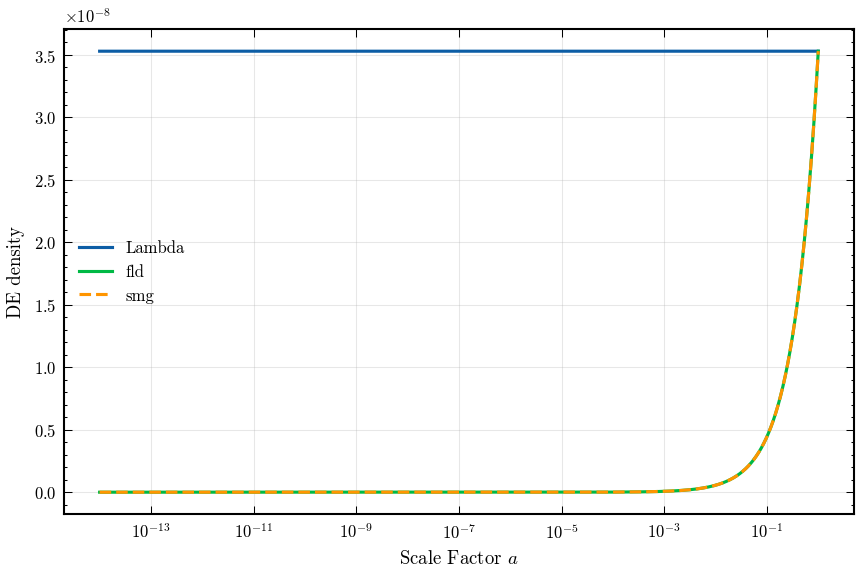

In [8]:
fig, ax = plt.subplots()

ax.semilogx(lcdm_a      , lcdm[0]['(.)rho_lambda'], label='Lambda')
ax.semilogx(w0wa_true_a , w0wa_true[0]['(.)rho_fld'], label='fld')
ax.semilogx(w0wa_pred_a , w0wa_pred[0]['(.)rho_smg'], '--', label='smg')

# ax.invert_xaxis()
ax.set_ylabel('DE density')
ax.set_xlabel('Scale Factor $a$')
ax.legend()


In [9]:
def interp(x_array,f_array):
    # Create interpolating function (linear or cubic)
    f_interp = interp1d(x_array, f_array, kind='linear', fill_value="extrapolate")
    
    return f_interp


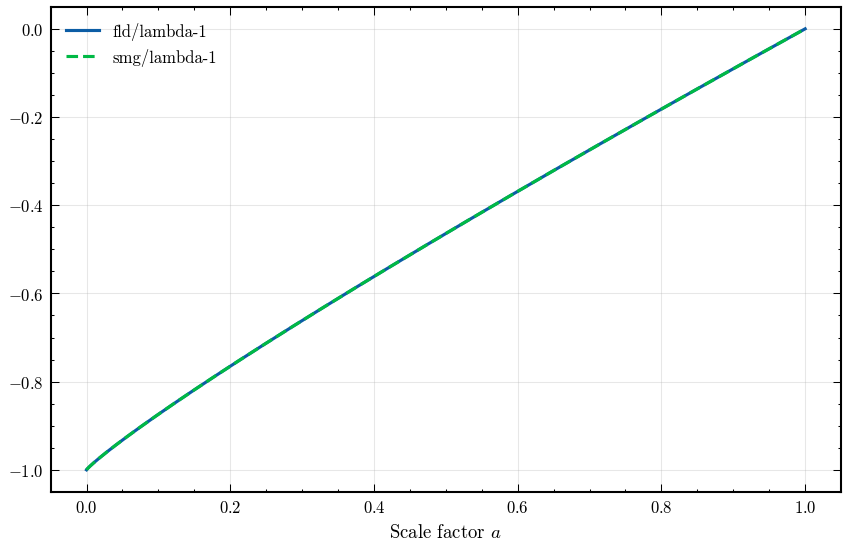

In [16]:
fig, ax = plt.subplots()

ax.plot(lcdm_a, w0wa_true[0]['(.)rho_fld']/lcdm[0]['(.)rho_lambda']-1, label=r'fld/lambda-1')
ax.plot(lcdm_a, interp(w0wa_pred_a, w0wa_pred[0]['(.)rho_smg'])(lcdm_a)/lcdm[0]['(.)rho_lambda']-1, '--', label=r'smg/lambda-1')

# ax.set_ylabel(r'$\frac{\rho_\text{de}}{\rho_\Lambda}-1$')
ax.set_xlabel('Scale factor $a$')
ax.legend()


In [17]:
print(lcdm[1]['scalar'][0].keys(),'\n',w0wa_true[1]['scalar'][0].keys(),'\n',w0wa_pred[1]['scalar'][0].keys())

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm', 'theta_tot', 'h_prime', 'H_T_prime', 'h_prime_prime', 'eta', 'eta_prime', 'alpha', 'alpha_prime', 'einstein00']) 
 dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm', 'delta_rho_fld', 'rho_plus_p_theta_fld', 'delta_p_fld', 'theta_tot', 'delta_fld', 'theta_fld', 'shear_fld', 'cs2_fld', 'h_prime', 'H_T_prime', 'h_prime_prime', 'eta', 'eta_prime', 'alpha', 'alpha_prime', 'einstein00']) 
 dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm', 'theta_tot', 'V_x_smg', 'V_x_prime_smg', 'V_x_prime_prime_smg', 'mass2_qs', 'mass2_qs_p', 'rad

In [ ]:
lcdm[1]['scalar'][0]['a']

array([ 8.34246202e+002,  8.34531816e+002,  8.34777862e+002,
        1.00000000e+000,  1.00000000e+000,  1.00000000e+000,
        1.00000000e+000,  1.00000000e+000,  9.90715599e-011,
        8.88611349e-011,  7.84286243e-011,  6.75440783e-011,
        1.00000000e+000,  1.00000000e+000,  1.00000000e+000,
        1.00000000e+000,  7.01125379e-011,  8.08660873e-011,
        9.12306190e-011,  1.01414264e-010,  2.45335074e-011,
        2.80843751e-011,  3.15068480e-011,  3.97722845e-321,
        1.14006531e+003,  1.14046082e+003,  1.14080051e+003,
        1.00000000e+000,  1.00000000e+000,  1.00000000e+000,
        1.00000000e+000,  1.11565975e-010,  9.95241848e-011,
        8.73187116e-011,  7.47082772e-011,  4.45153147e-321,
        1.00000000e+000,  1.00000000e+000,  1.00000000e+000,
        1.00000000e+000,  7.06933566e-011,  8.34961156e-011,
        9.57953251e-011,  1.07866742e-010,  2.20000701e-011,
        2.61899939e-011,  3.01646753e-011,  3.40294227e-011,
        2.23270693e-182,

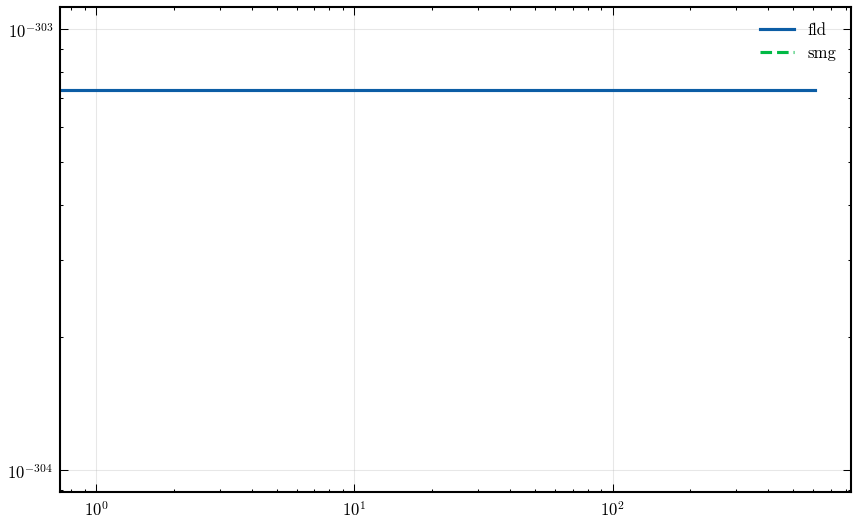

In [23]:
fig, ax = plt.subplots()

ax.loglog(w0wa_true[1]['scalar'][0]['delta_rho_fld'], label='fld')
ax.loglog(w0wa_pred[1]['scalar'][0]['V_x_smg'], '--', label= 'smg')

ax.legend()

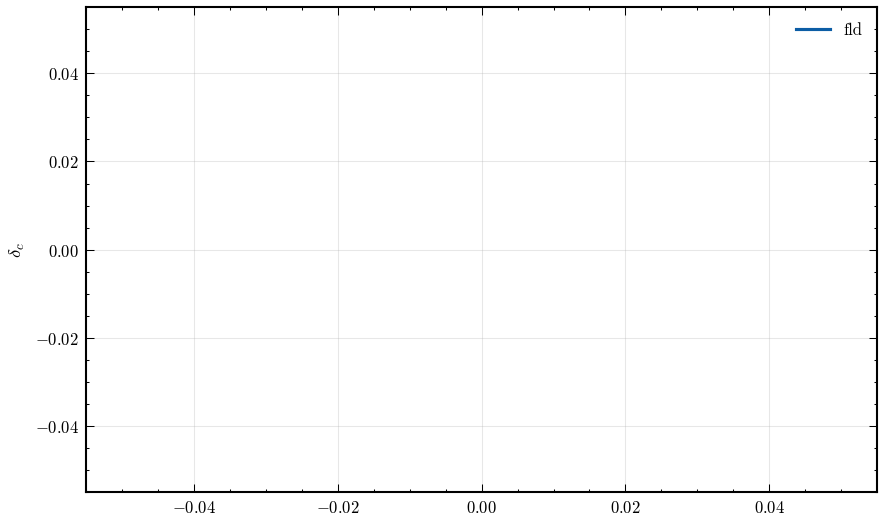

In [14]:
fig, ax = plt.subplots()

# ax.plot(lcdm[1]['scalar'][0]['delta_cdm'])
# ax.plot(lcdm[1]['scalar'][0]['delta_cdm'], label='lcdm')
ax.plot(w0wa_true[1]['scalar'][0]['a'], w0wa_true[1]['scalar'][0]['delta_cdm'], label='fld')
# ax.plot(w0wa_pred[1]['scalar'][0]['delta_cdm'], label='smg')

ax.set_ylabel('$\delta_{c}$')

ax.legend()

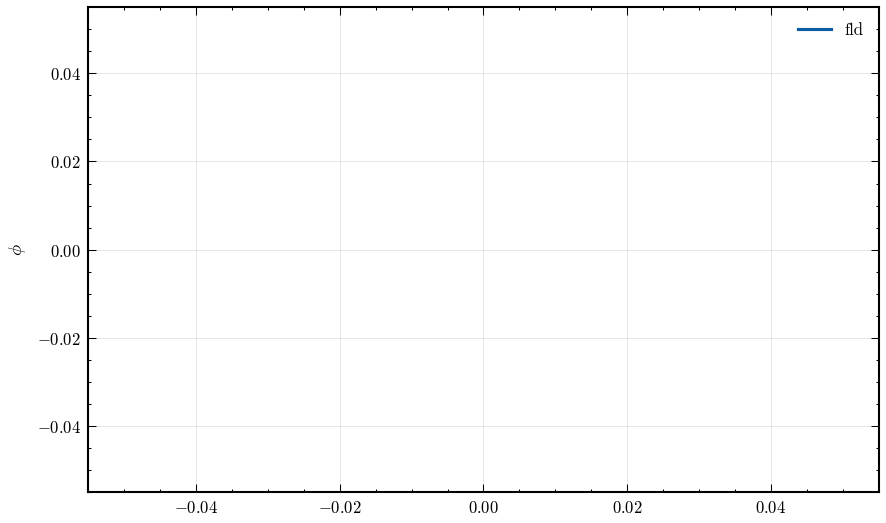

In [15]:
fig, ax = plt.subplots()

# ax.plot(lcdm[1]['scalar'][0]['delta_cdm'])
# ax.plot(aa(len(lcdm[1]['scalar'][0]['tau [Mpc]'])), lcdm[1]['scalar'][0]['phi'], label='lcdm')
ax.plot(w0wa_true[1]['scalar'][0]['a'], w0wa_true[1]['scalar'][0]['phi'], label='fld')
# ax.plot(w0wa_pred[1]['scalar'][0]['phi'], label='smg')

ax.set_ylabel('$\phi$')
ax.legend()